In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv')

In [3]:
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [4]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [5]:
# changing format and rename columns
df = df.astype({'Month': 'datetime64[ns]'})\
    .rename(columns={'Month': 'ds',
                     'Sales': 'y'})

<AxesSubplot:title={'center':'Sales over year'}, xlabel='ds'>

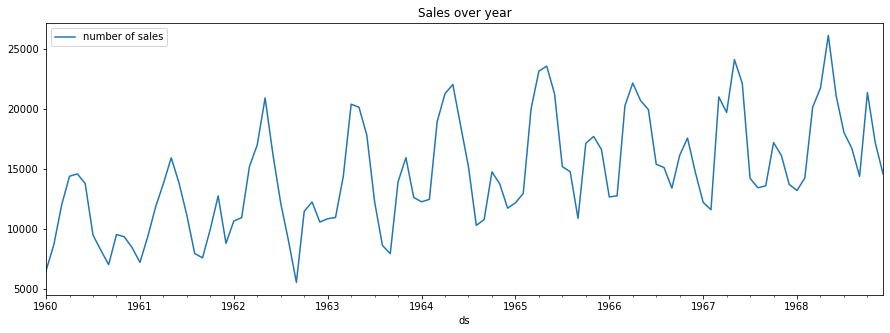

In [6]:
df.plot(x='ds', y='y', figsize=(15, 5), title='Sales over year', label='number of sales')

Первое приближение -  модель без учёта месячной сезонности

In [65]:
pred_model = Prophet()

In [66]:
# train model
train_periods = 12
train_df = df[:-train_periods]

pred_model.fit(train_df);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
future_forecast = pred_model.make_future_dataframe(periods=train_periods, freq='M')

In [68]:
forecast = pred_model.predict(future_forecast)

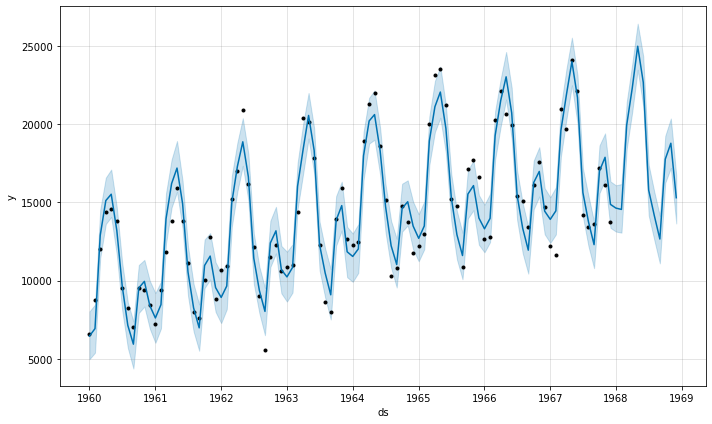

In [69]:
pred_model.plot(forecast);

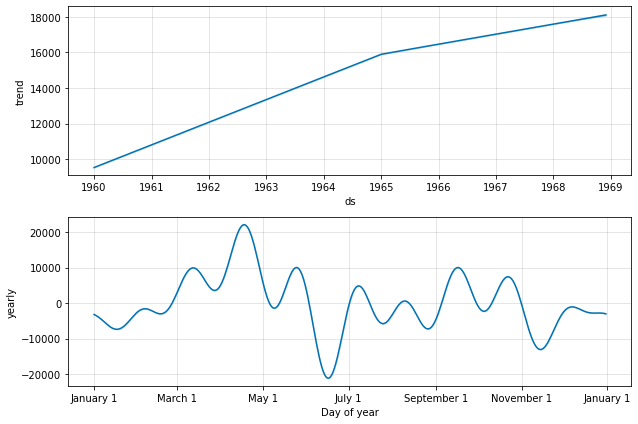

In [85]:
pred_model.plot_components(forecast);

In [70]:
check_df = forecast[-train_periods:][['yhat']].join(df[-train_periods:][['y']])

In [71]:
check_df = check_df.eval('e = abs(yhat - y)')\
    .eval('p = 100 * (e / y)')

In [72]:
print(f'Средняя абсолютная ошибка = {check_df.e.mean()}')
print(f'Средняя относительная ошибка = {check_df.p.mean()}')

Средняя абсолютная ошибка = 1470.9995492551327
Средняя относительная ошибка = 8.267394406496434


Второе приближение - учёт сезонности

In [95]:
prophet_with_seasonality = Prophet(yearly_seasonality=True)

In [96]:
prophet_with_seasonality.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [97]:
future_forecast_s = prophet_with_seasonality.make_future_dataframe(periods=train_periods, freq='M')

In [98]:
forecast_s = prophet_with_seasonality.predict(future_forecast_s)

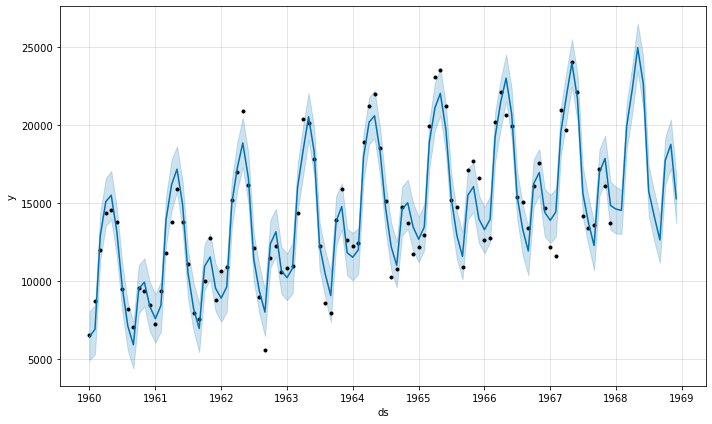

In [99]:
prophet_with_seasonality.plot(forecast_s);

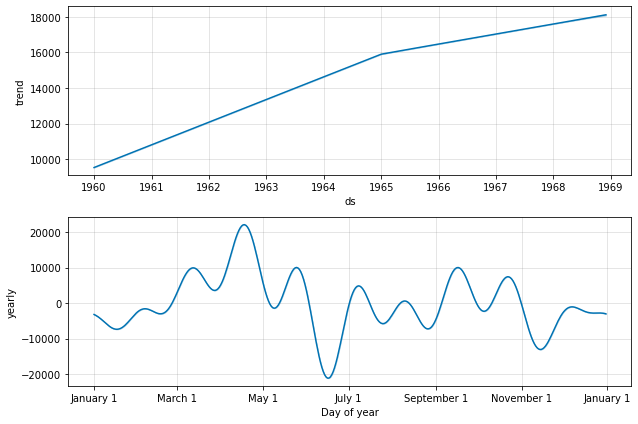

In [100]:
prophet_with_seasonality.plot_components(forecast_s);

In [101]:
check_season_df = forecast_s[-train_periods:][['yhat']].join(df[-train_periods:][['y']])

In [102]:
check_season_df = check_season_df.eval('e = abs(yhat - y)')\
    .eval('p = 100 * (e / y)')

In [103]:
print(f'Средняя абсолютная ошибка = {check_season_df.e.mean()}')
print(f'Средняя относительная ошибка = {check_season_df.p.mean()}')

Средняя абсолютная ошибка = 1470.9995492551327
Средняя относительная ошибка = 8.267394406496434
